# Some info before start
- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.


- **TARGET:** Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Load data and explore it

In [69]:
df = pd.read_csv('data/train.csv')
print('Data shape', df.shape)
df.head()

Data shape (8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [70]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


It seems that some data has NaNs (count < than length of the shape)

In [71]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

# Target

Balanced Dataset!

<AxesSubplot:xlabel='Transported', ylabel='count'>

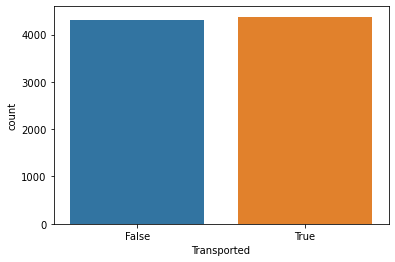

In [72]:
sns.countplot(df.Transported)

## PassengerId 
- A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- Lets get some useful information from here:
    - Split the data into
        - gggg
        - pp

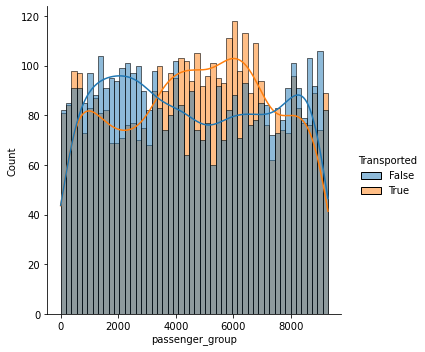

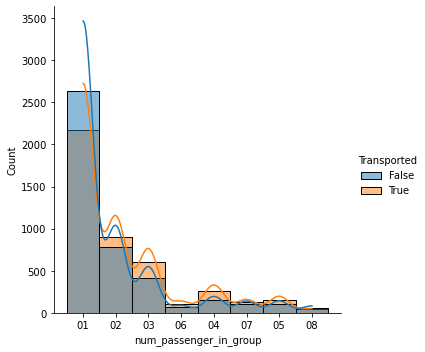

In [73]:
df[['passenger_group', 'passenger_num_in_group']] = df['PassengerId'].str.split('_', expand=True)
df['passenger_group'] = df['passenger_group'].astype(int)

# mirem que passa
sns.displot(data = df, x = 'passenger_group', hue = 'Transported', alpha = 0.5, kde = True, bins = 50)
plt.show()

# new var: number of people per group. It has to be mergde with original one.
df = df.merge(df.groupby('passenger_group')['passenger_num_in_group'].max().reset_index().rename(columns={'passenger_num_in_group':'num_passenger_in_group'}), how = 'left', on = 'passenger_group' )

# mirem que passa
sns.displot(data = df, x = 'num_passenger_in_group', hue = 'Transported', alpha = 0.5, kde = True, bins = 50)
plt.show()

A priori es molt curios, perque sembla que hi ha dos conjunt de 'passenger_group' que tenen comportaments diferents!
- del 500 al 3000 (aprox) --> Transported False predomina
- del 3000 al 6500 aprox --> Transported True domina

Per nombre membres de cada grup:
-  per unitats de 1 persona per grup, sembla que domina no transported

# Categorical Variables

In [100]:
# create cabin features
df[['cabin_deck', 'cabin_num','cabin_side']] = df['Cabin'].str.split('/', expand=True)

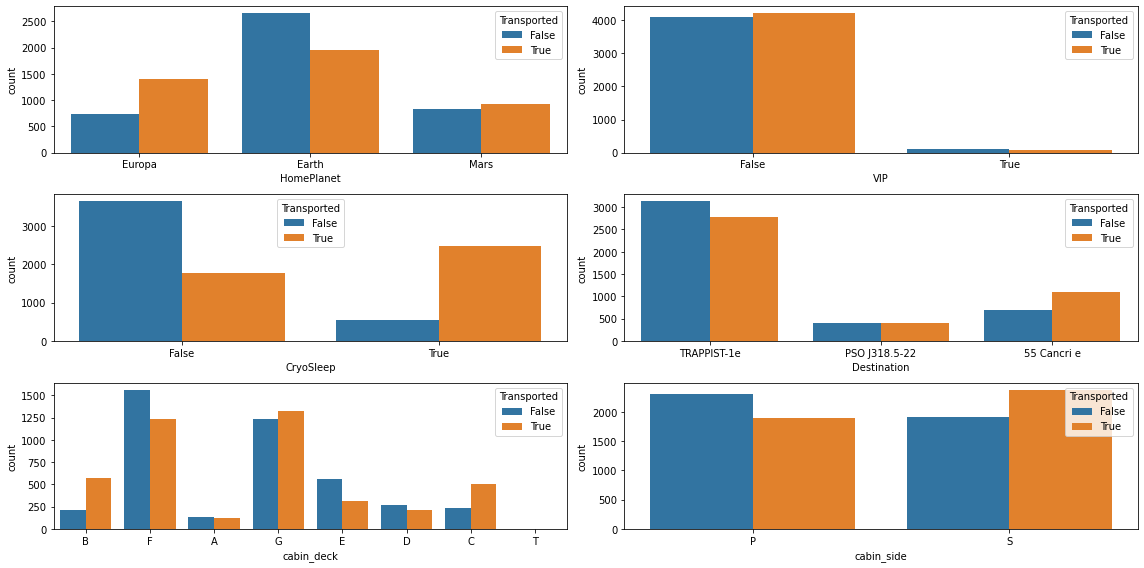

In [97]:
df['cabin_num'] = df['cabin_num'].astype(float)

fig, axes = plt.subplots(3, 2, figsize=(16,8))

sns.countplot(df.HomePlanet, hue = df.Transported, ax = axes[0,0])
sns.countplot(df.CryoSleep, hue = df.Transported, ax = axes[1,0])
sns.countplot(df.VIP, hue = df.Transported, ax = axes[0,1])
sns.countplot(df.Destination, hue = df.Transported, ax = axes[1,1])

sns.countplot(df.cabin_deck, hue = df.Transported, ax = axes[2,0])
sns.countplot(df.cabin_side, hue = df.Transported, ax = axes[2,1])

plt.tight_layout()

<Figure size 1440x288 with 0 Axes>

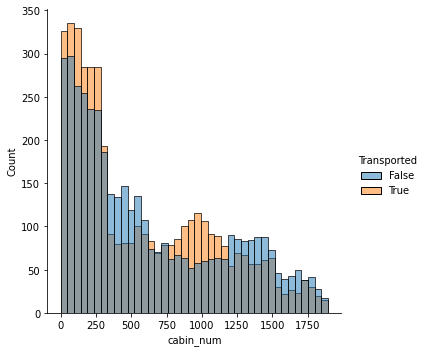

In [98]:
plt.figure(figsize=(20,4))
df['cabin_num'] = df['cabin_num'].astype(float)
sns.displot(data = df, x ='cabin_num', bins = 40, hue = 'Transported')

Sembla que hi ha correlacio clara amb algunes de les variables: 
- HomePlanet (Europe and Mars with higher transported probablity)
- Cryosleep: when True, Transported almost ensured
- Destination: some differences
- VIP: does not seem very significant in this case.....
- cabin_deck: clarissima correlacio
- cabin_side: tb
- cabin_num: la podem tractar com a numerica, ja que es veuen zones de diferencies entre grups...

In [99]:
df.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,passenger_group,cabin_num
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026,-0.009439,-0.132255
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611,-0.000346,-0.008986
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566,-0.009552,-0.183429
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141,0.017397,0.001727
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131,-0.005211,-0.131342
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075,0.015432,-0.139080
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000,0.021491,-0.045097
passenger_group,-0.009439,-0.000346,-0.009552,0.017397,-0.005211,0.015432,0.021491,1.000000,0.679723
cabin_num,-0.132255,-0.008986,-0.183429,0.001727,-0.131342,-0.139080,-0.045097,0.679723,1.000000


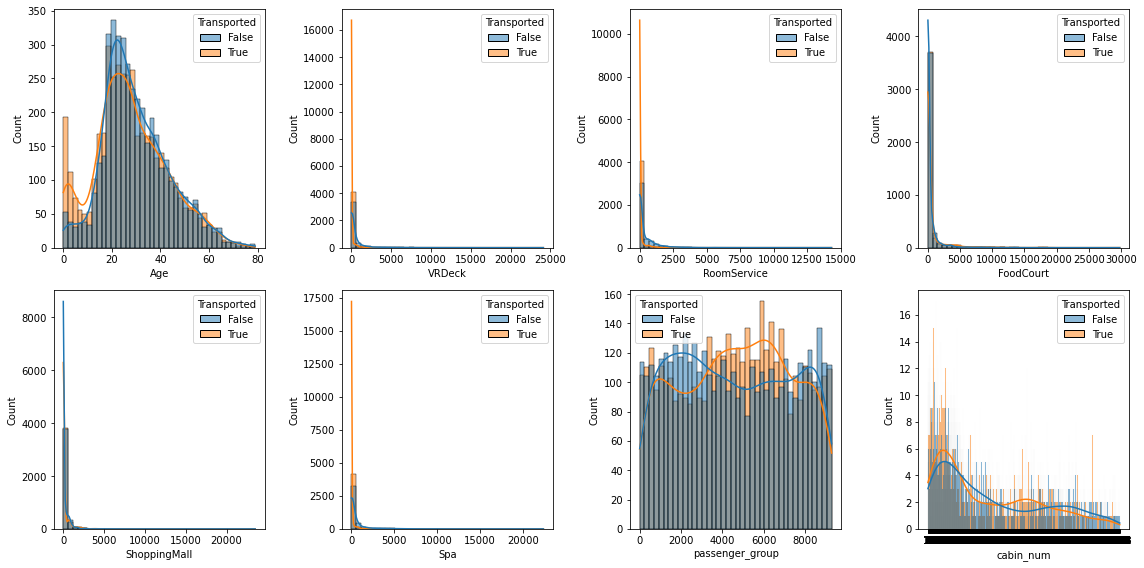

In [116]:
# select the columns to be plotted
cols = ['Age', 'VRDeck','RoomService','FoodCourt','ShoppingMall','Spa','passenger_group','cabin_num']

# create the figure and axes
fig, axes = plt.subplots(2, 4, figsize = (16 , 8))
axes = axes.ravel()  # flattening the array makes indexing easier

for col, ax in zip(cols, axes):
    sns.histplot(data = df, x = col, hue ='Transported', kde = True, ax=ax, bins = 40)

fig.tight_layout()
plt.show()

<AxesSubplot:xlabel='Total_expenses', ylabel='Count'>

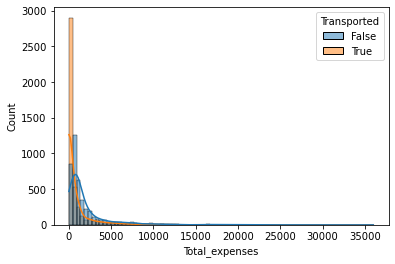

In [125]:
# new variable, with sum of ALL expenses done in the boat
cols = ['VRDeck','RoomService','FoodCourt','ShoppingMall','Spa']

df['Total_expenses'] = df[cols].sum(axis = 1)

sns.histplot(data = df, x = 'Total_expenses', hue ='Transported', kde = True, bins = 80)


# Fill NaNs